<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Simplify-with-sklearn.cluster.k_means" data-toc-modified-id="Simplify-with-sklearn.cluster.k_means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simplify with sklearn.cluster.k_means</a></span></li><li><span><a href="#Obtain-H-representation-of-the-set-of-feasible-contact-wrenches-using-Fukuda's-Double-Description-Algorithm" data-toc-modified-id="Obtain-H-representation-of-the-set-of-feasible-contact-wrenches-using-Fukuda's-Double-Description-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Obtain H-representation of the set of feasible contact wrenches using Fukuda's Double Description Algorithm</a></span></li></ul></div>

# Introduction
This note computes the polyhedral representation of the convex hull of the set of feasible wrenches.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
file_name = '/home/hung/Dropbox/ros_data/toppra_application/alum_block1'

In [3]:
with open(file_name) as f:
    content = f.readlines()
content = content[10:]
ws = []
for line in content:
    array = [float(s[1:-1]) for s in line.split(",")[3:9]]
    ws.append(array)
ws = np.array(ws) / 1e6

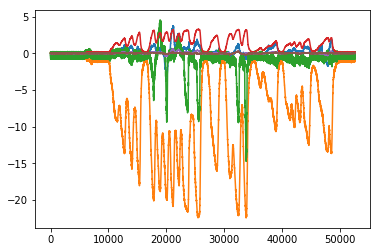

In [4]:
plt.plot(ws)
plt.show()

In [7]:
hull = ConvexHull(ws)  # The convex hull
ws_hull = hull.points[hull.vertices]  # Coordinates of the vertices of the hull
print "Convex hull has: {:d} points and {:d} equation".format(hull.vertices.shape[0], hull.equations.shape[0])

Convex hull has: 2512 points and 238998 equation


# Simplify with sklearn.cluster.k_means

In [45]:
import sklearn.cluster

In [137]:
ws_hull_kmean, _, score = sklearn.cluster.k_means(ws_hull, 500)
print "Mean square distance {:f}".format(score)

Mean square distance 14.667087


In [120]:
sklearn.cluster.k_means?

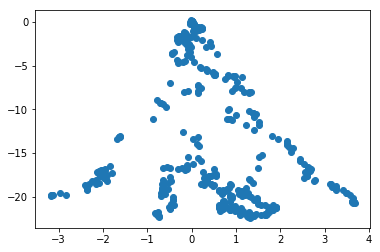

In [92]:
plt.scatter(ws_hull_kmean[:, 0], ws_hull_kmean[:, 1])
plt.show()

# Obtain H-representation of the set of feasible contact wrenches using Fukuda's Double Description Algorithm

In [ ]:
import cdd

n = ws_hull_kmean.shape[0]
mat = cdd.Matrix(np.hstack((np.ones((n, 1)), np.round(ws_hull_kmean, decimals=3))))
mat.rep_type = cdd.RepType.GENERATOR
cdd_poly = cdd.Polyhedron(mat)

In [136]:
n

200

In [134]:
np.array(cdd_poly.get_inequalities()).shape

(15154, 7)

In [ ]:
hull2 = ConvexHull(ws_hull_kmean)

In [128]:
hull.vertices.shape

(2512,)